# The MovieSummaries Dataset

The goal of this notebook is to do some data exploration, preliminary analysis and a first preprocessing on the MovieSummaries Dataset before merging it with the other ones.

- [Dataset description](#datasets-description)
- [Characters Dataset](#characters-dataset)
    - [Characters data exploration](#characters-data-exploration)
    - [Characters data preprocessing](#characters-data-preprocessing)
        - [Release date and date of birth](#release-date-and-date-of-birth)
        - [Height](#height)
        - [Age](#age)
        - [Duplicates](#duplicates)
- [Movies Dataset](#movies-dataset)
    - [Movies data exploration](#movies-data-exploration)
    - [Movies data preprocessing](#movies-data-preprocessing)
        - [Release date](#release-date)
        - [Runtime](#runtime)
    - [Movies data visualization](#movies-data-visualization)
        - [Release date](#release-date)
        - [Runtime](#runtime)
        - [Genres](#genres)
        - [Countries](#countries)
        - [Languages](#languages)
- [Plot summaries dataset](#plot-summaries-dataset)
    - [Plots data exploration](#plots-data-exploration)
- [Movies and Plot summaries datasets merging](#movies-and-plot-summaries-datasets-merging)

In [ ]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
from src.constants import *
from src.utils.helpers import *

## Datasets description

This project utilizes a rich collection of datasets encompassing movies, characters, and plot summaries. The primary datasets include:

- **Characters Dataset** (`character.metadata.tsv`): Contains detailed metadata on movie characters and the actors portraying them. Key attributes include Wikipedia and Freebase IDs, movie release dates, character names, actor birthdates, genders, heights, ethnicities, and ages at the time of movie release.

- **Movies Dataset** (`movie.metadata.tsv`) Includes comprehensive information about movies. It features data such as Wikipedia and Freebase IDs, movie names, release dates, box office revenues, runtimes, languages, countries, and genres.

- **Plot Summaries Dataset** (`plot_summaries.text`): Offers a concise summary of movie plots, linked to movies through Wikipedia movie IDs.

## Characters Dataset
### characters data exploration

In [2]:
# Load the data
df_characters = pd.read_table(
    CMU_CHARACTER,
    names=[
        "wikipedia_id",
        "freebase_id",
        "release_date",
        "character_name",
        "actor_dob",
        "actor_gender",
        "actor_height",
        "actor_ethnicity",
        "actor_name",
        "actor_age_at_movie_release",
        "freebase_actor_map_id",
        "freebase_character_id",
        "freebase_actor_id",
    ],
)
df_characters.head()

,wikipedia_id,freebase_id,release_date,character_name,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_at_movie_release,freebase_actor_map_id,freebase_character_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [3]:
df_characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450669 entries, 0 to 450668
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   wikipedia_id                450669 non-null  int64  
 1   freebase_id                 450669 non-null  object 
 2   release_date                440674 non-null  object 
 3   character_name              192794 non-null  object 
 4   actor_dob                   344524 non-null  object 
 5   actor_gender                405060 non-null  object 
 6   actor_height                154824 non-null  float64
 7   actor_ethnicity             106058 non-null  object 
 8   actor_name                  449441 non-null  object 
 9   actor_age_at_movie_release  292556 non-null  float64
 10  freebase_actor_map_id       450669 non-null  object 
 11  freebase_character_id       192804 non-null  object 
 12  freebase_actor_id           449854 non-null  object 
dtypes: float64(2),

We can identify from the output above that:
- There are some missing values.
- Some type are not exploitable (e.g. the `release_date` and `actor_dob`  are `object`s, not exploitable dates)

In [4]:
print(
    "Total amount of rows that contain a NaN value: ",
    df_characters.isna().any(axis=1).sum(),
)
pd.DataFrame(
    {
        "nan_sum": df_characters.isna().sum(),
        "nan_percentage": df_characters.isna().mean() * 100,
    }
)

Total amount of rows that contain a NaN value:  405405


,nan_sum,nan_percentage
wikipedia_id,0,0.000000
freebase_id,0,0.000000
release_date,9995,2.217814
character_name,257875,57.220488
actor_dob,106145,23.552763
actor_gender,45609,10.120288
actor_height,295845,65.645740
actor_ethnicity,344611,76.466542
actor_name,1228,0.272484
actor_age_at_movie_release,158113,35.084064


Concerning the missing values problem, we have 4 options: perform value imputation, not using the problematic features, dropping the rows or filling the missing values using external datasets.

But let's continue our exploration first by looking at the values.

In [5]:
df_characters.describe(include="all")

,wikipedia_id,freebase_id,release_date,character_name,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_at_movie_release,freebase_actor_map_id,freebase_character_id,freebase_actor_id
count,4.506690e+05,450669,440674,192794,344524,405060,154824.000000,106058,449441,292556.000000,450669,192804,449854
unique,NaN,64330,18476,126629,29494,2,NaN,479,134078,NaN,450669,183435,135760
top,NaN,/m/0cc8620,2008,Doctor,1908-05-30,M,NaN,/m/0dryh9k,Mel Blanc,NaN,/m/0bgchxw,/m/0h577m2,/m/0c5vh
freq,NaN,115,5453,198,791,270257,NaN,16351,791,NaN,1,146,791
mean,1.396975e+07,NaN,NaN,NaN,NaN,NaN,1.788893,NaN,NaN,37.788523,NaN,NaN,NaN
std,1.079662e+07,NaN,NaN,NaN,NaN,NaN,4.379940,NaN,NaN,20.587870,NaN,NaN,NaN
min,3.300000e+02,NaN,NaN,NaN,NaN,NaN,0.610000,NaN,NaN,-7896.000000,NaN,NaN,NaN
25%,3.759292e+06,NaN,NaN,NaN,NaN,NaN,1.676400,NaN,NaN,28.000000,NaN,NaN,NaN
50%,1.189065e+07,NaN,NaN,NaN,NaN,NaN,1.750000,NaN,NaN,36.000000,NaN,NaN,NaN
75%,2.366501e+07,NaN,NaN,NaN,NaN,NaN,1.830000,NaN,NaN,47.000000,NaN,NaN,NaN


We find interesting results:
- How can an actors' height be 510m ? 
- How can an actor's age be negative ?

### Characters data preprocessing
#### Release date and date of birth
To tackle the type problem we convert the `object` type to `datetime` type.

In [6]:
df_characters["release_date"] = df_characters["release_date"].apply(convert_to_datetime)
df_characters["release_date"] = pd.to_datetime(
    df_characters["release_date"], errors="coerce"
)

df_characters["actor_dob"] = df_characters["actor_dob"].apply(convert_to_datetime)
df_characters["actor_dob"] = pd.to_datetime(df_characters["actor_dob"], errors="coerce")

#### Height

In [7]:
df_characters[df_characters["actor_height"] > 2.5]

,wikipedia_id,freebase_id,release_date,character_name,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_at_movie_release,freebase_actor_map_id,freebase_character_id,freebase_actor_id
21619,1291587,/m/04qk12,2004-09-01,young Georgie,1986-03-13,M,180.0,/m/0dc58y8,Zohren Weiss,18.0,/m/0k276dx,/m/0k276dz,/m/0bggwvl
49659,30865068,/m/02ml14,1998-10-15,NaN,1972-12-06,M,510.0,NaN,Vince Corazza,25.0,/m/0n9ld0y,NaN,/m/08hqh0
59719,12206655,/m/02vvw24,NaT,Dominic,1986-03-13,M,180.0,/m/0dc58y8,Zohren Weiss,NaN,/m/0k276dq,/m/0h8hcr1,/m/0bggwvl
104140,17999628,/m/047n_2q,1998-01-01,NaN,1972-12-06,M,510.0,NaN,Vince Corazza,25.0,/m/0cg31bd,NaN,/m/08hqh0
205679,1373475,/m/04xmx8,2003-08-15,Jackal Johnson,1972-12-06,M,510.0,NaN,Vince Corazza,30.0,/m/02vbm0k,/m/0h60xk7,/m/08hqh0
219383,179326,/m/018gq3,1996-11-18,Herbert,1986-03-13,M,180.0,/m/0dc58y8,Zohren Weiss,10.0,/m/0bggwv8,/m/0bggwvc,/m/0bggwvl
301653,4667507,/m/0cg9n6,2001-11-29,NaN,1972-12-06,M,510.0,NaN,Vince Corazza,28.0,/m/0cg0zwp,NaN,/m/08hqh0
316621,3915041,/m/0b6lyp,2002-01-01,NaN,1972-12-06,M,510.0,NaN,Vince Corazza,29.0,/m/02vc5p5,NaN,/m/08hqh0
341890,29290087,/m/0b3w9mr,1997-04-07,NaN,1972-12-06,M,510.0,NaN,Vince Corazza,24.0,/m/0gvwy8x,NaN,/m/08hqh0
360967,14413223,/m/03d2rnl,2012-04-20,Young Punk Guy,1986-03-13,M,180.0,/m/0dc58y8,Zohren Weiss,26.0,/m/0m4q87d,/m/0k9tfs8,/m/0bggwvl


After a little search on the internet, we found that for the 510.0m problem, the actor's height is 5'10" (1.78m).

In [8]:
df_characters.loc[df_characters["actor_height"] == 510, "actor_height"] = 1.78

Concerning the 180m problem, we can guess that the actor's height is 1.80m, but we can't find any source to confirm this (internet or other rows). We drop these rows.

In [9]:
df_characters.drop(
    df_characters[df_characters["actor_height"] > 2.5].index, inplace=True
)

#### Age
Let's then take care of the age problem by removing the rows with negative age. 

In [10]:
nb_removed = df_characters.loc[(df_characters["actor_age_at_movie_release"] < 0)].shape[0]
df_characters = df_characters[df_characters["actor_age_at_movie_release"] > 0]
print(nb_removed, "such rows have been removed",)

381 such rows have been removed


In [11]:
# Count the number of actor born after the movie release
df_characters[df_characters["actor_dob"] > df_characters["release_date"]].shape[0]

0

#### Duplicates

In [12]:
# Drop the rows that have duplicates
df_characters.drop_duplicates(
    subset=["freebase_id", "freebase_actor_id", "freebase_character_id"], inplace=True
)

## Movies Dataset
### Movies data exploration

In [13]:
# Load the data
df_movies = pd.read_table(
    CMU_MOVIE,
    names=[
        "wikipedia_id",
        "freebase_id",
        "title",
        "release_date",
        "revenue",
        "runtime",
        "languages",
        "countries",
        "genres",
    ],
    header=None,
)
df_movies.head()

,wikipedia_id,freebase_id,title,release_date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [14]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   wikipedia_id  81741 non-null  int64  
 1   freebase_id   81741 non-null  object 
 2   title         81741 non-null  object 
 3   release_date  74839 non-null  object 
 4   revenue       8401 non-null   float64
 5   runtime       61291 non-null  float64
 6   languages     81741 non-null  object 
 7   countries     81741 non-null  object 
 8   genres        81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


In [15]:
print(
    "Total amount of rows that contain a NaN value: ",
    df_movies.isna().any(axis=1).sum(),
)
pd.DataFrame(
    {
        "nan_sum": df_movies.isna().sum(),
        "nan_percentage": df_movies.isna().mean() * 100,
    }
)

Total amount of rows that contain a NaN value:  73498


,nan_sum,nan_percentage
wikipedia_id,0,0.000000
freebase_id,0,0.000000
title,0,0.000000
release_date,6902,8.443743
revenue,73340,89.722416
runtime,20450,25.018045
languages,0,0.000000
countries,0,0.000000
genres,0,0.000000


In [16]:
# Check for duplicate row
print("Check for duplicate entries:")
print(df_movies.duplicated().sum())

# Check for duplicated row with same name
print("Check for duplicate entries with title only:")
print(df_movies.duplicated(subset=["title"]).sum())

# Check for duplicated row with same name and date release
print("Check for duplicate entries with title and date release:")
print(df_movies.duplicated(subset=["title", "release_date"]).sum())

# Check for duplicate row with same name and runtime
print("Check for duplicate entries with title and movie runtime:")
print(df_movies.duplicated(subset=["title", "runtime"]).sum())

# Check for duplicate row with same wikipedia ID
print("Check for duplicate entries with wikipedia ID:")
print(df_movies.duplicated(subset=["wikipedia_id"]).sum())

Check for duplicate entries:
0
Check for duplicate entries with title only:
6263
Check for duplicate entries with title and date release:
103
Check for duplicate entries with title and movie runtime:
628
Check for duplicate entries with wikipedia ID:
0


We have some duplicate entries on the name, but the wikipedia ID is always unique. But this is due to film remakes.

In [17]:
df_movies.describe(include="all")

,wikipedia_id,freebase_id,title,release_date,revenue,runtime,languages,countries,genres
count,8.174100e+04,81741,81741,74839,8.401000e+03,6.129100e+04,81741,81741,81741
unique,NaN,81741,75478,20389,NaN,NaN,1817,2124,23817
top,NaN,/m/03vyhn,Alice in Wonderland,2006,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
freq,NaN,1,17,1011,NaN,NaN,33748,30300,6851
mean,1.740784e+07,NaN,NaN,NaN,4.799363e+07,1.118192e+02,NaN,NaN,NaN
std,1.098791e+07,NaN,NaN,NaN,1.121753e+08,4.360070e+03,NaN,NaN,NaN
min,3.300000e+02,NaN,NaN,NaN,1.000000e+04,0.000000e+00,NaN,NaN,NaN
25%,7.323695e+06,NaN,NaN,NaN,2.083193e+06,8.100000e+01,NaN,NaN,NaN
50%,1.777899e+07,NaN,NaN,NaN,1.063969e+07,9.300000e+01,NaN,NaN,NaN
75%,2.715573e+07,NaN,NaN,NaN,4.071696e+07,1.060000e+02,NaN,NaN,NaN


Looking at the output, we observe that:
- There a problem with the `release_date` column.
- The `runtime` column seems to have some outliers, with at least one movie with a runtime of 0, and one of 1 million minutes.

### Movies data preprocessing
#### Release date

We have a similar date problem as the one we had with the characters dataset. We'll fix it the same way.

In [18]:
# Convert the date strings to datetime objects
df_movies["release_date"] = df_movies["release_date"].apply(convert_to_datetime)
df_movies["release_date"] = pd.to_datetime(df_movies["release_date"], errors="coerce")

#### Runtime

We know that there are some outliers for `runtime`. We'll drop the rows with a `runtime` less or equal to 0 and greater than 500 minutes. 

In [19]:
old_shape = df_movies.shape[0]
df_movies.drop(df_movies[df_movies["runtime"] > 500].index, inplace=True)
df_movies.drop(df_movies[df_movies["runtime"] <= 0].index, inplace=True)
print(f"Have removed {old_shape - df_movies.shape[0]} rows")

Have removed 47 rows


### Movies data visualization
#### Release date

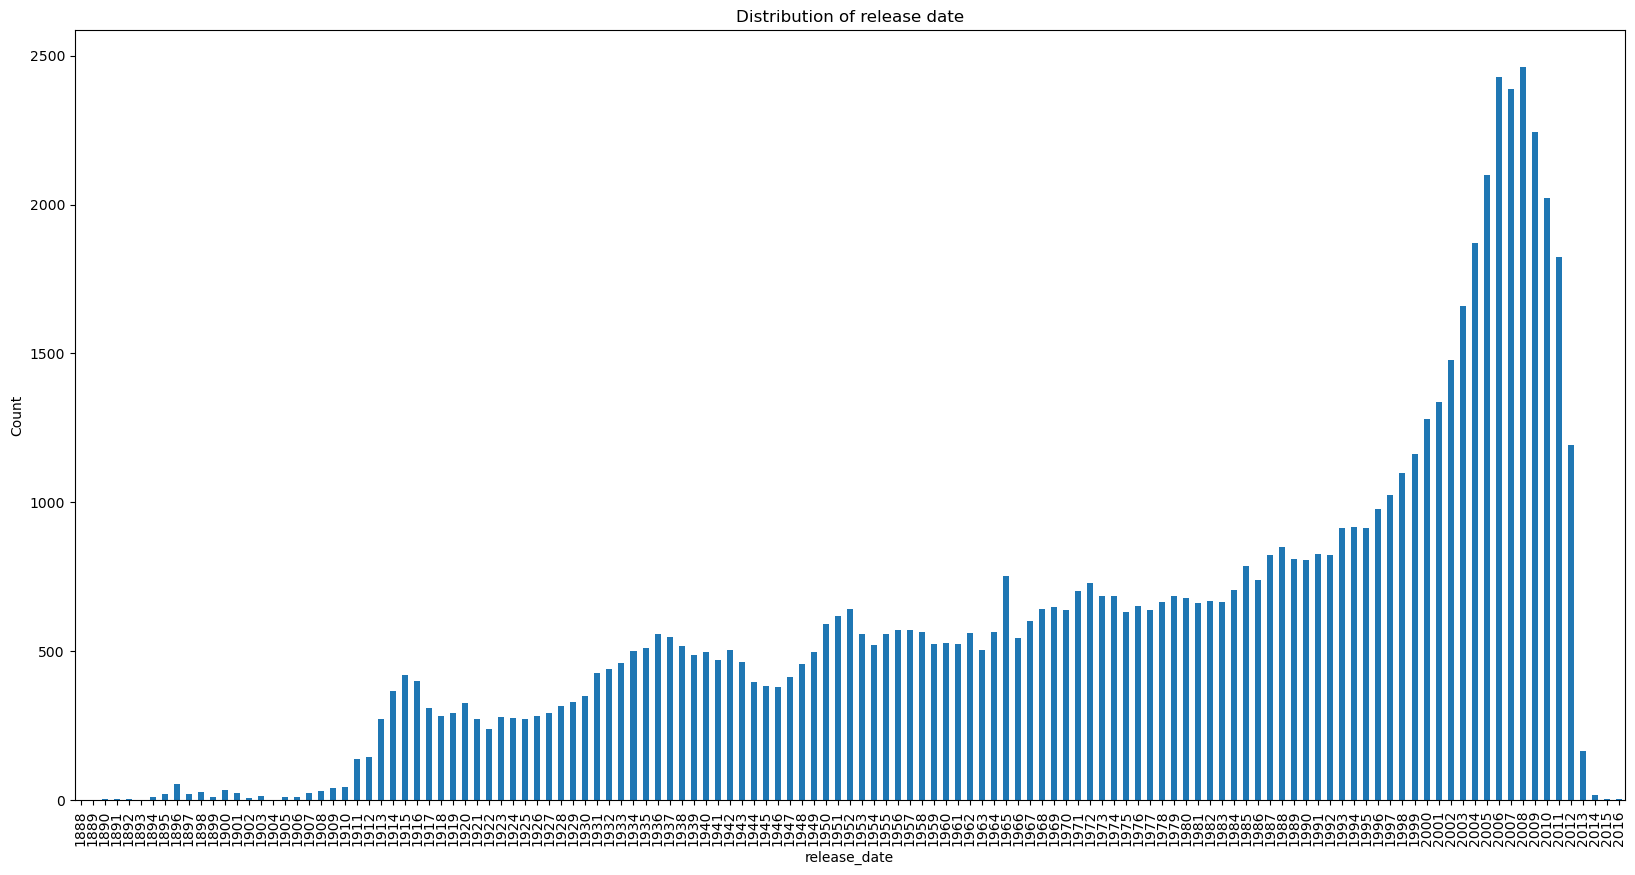

In [20]:
plt.figure(figsize=(20, 10))
plt.title("Distribution of release date")
plt.xlabel("Release date")
plt.ylabel("Count")
df_movies.dropna(subset=["release_date"])[
    "release_date"
].dt.year.sort_values().value_counts(sort=False).plot(kind="bar")
plt.show()

In [21]:
print(
    f"There are {len(df_movies[df_movies['release_date'] >= pd.to_datetime('2014')])} movies are after 2014"
)

There are 24 movies are after 2014


#### Runtime

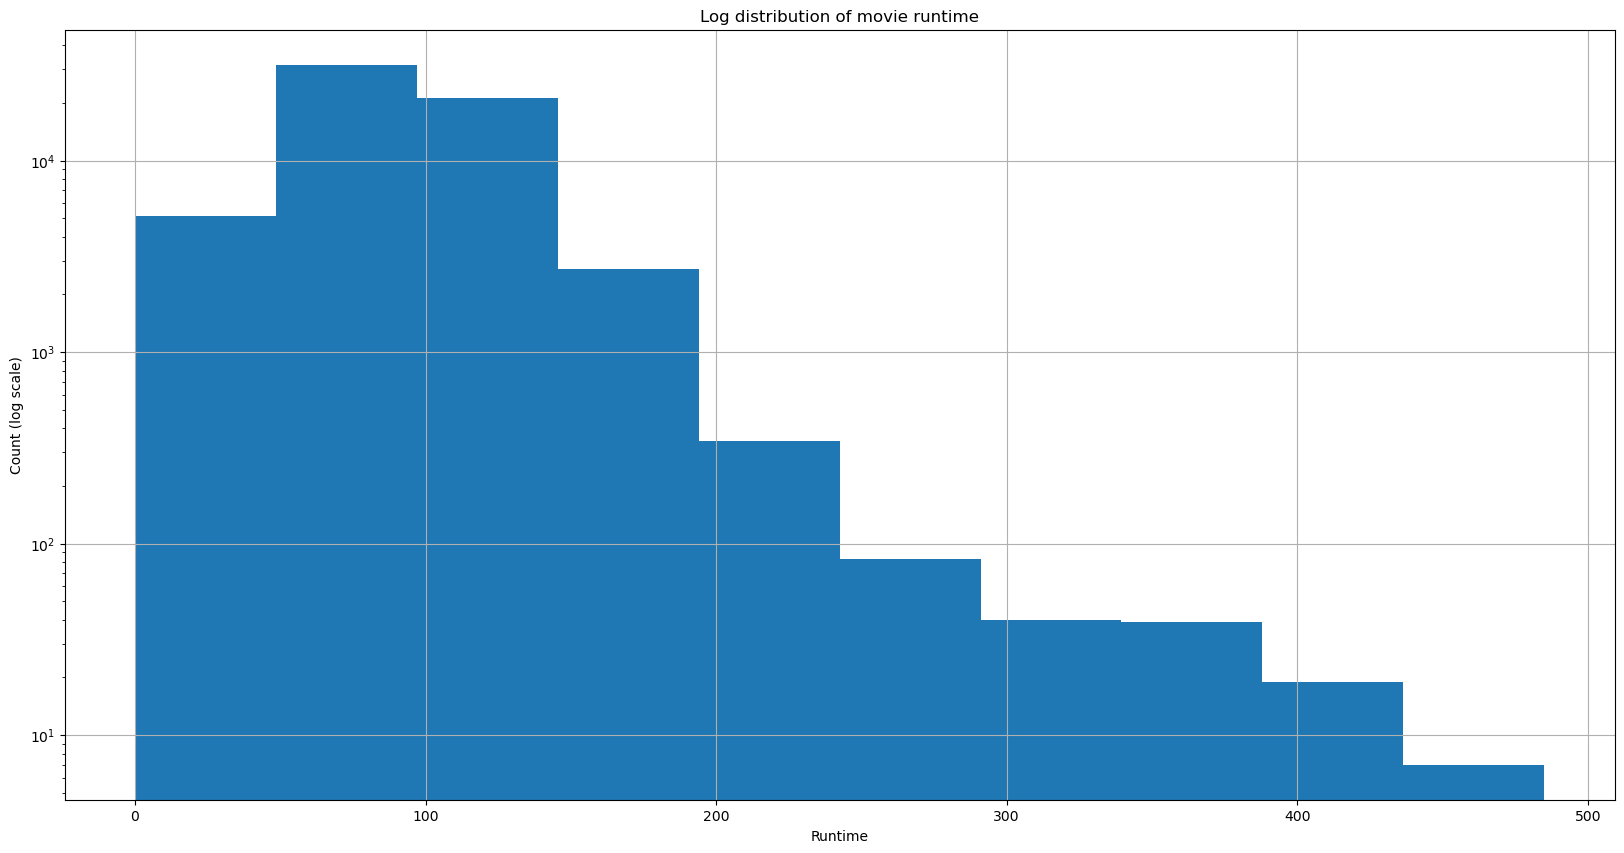

In [22]:
plt.figure(figsize=(20, 10))
plt.title("Log distribution of movie runtime")
plt.xlabel("Runtime")
plt.ylabel("Count (log scale)")
plt.yscale("log")
df_movies.dropna(subset=["runtime"])["runtime"].hist(bins=10)
plt.show()

#### Genres

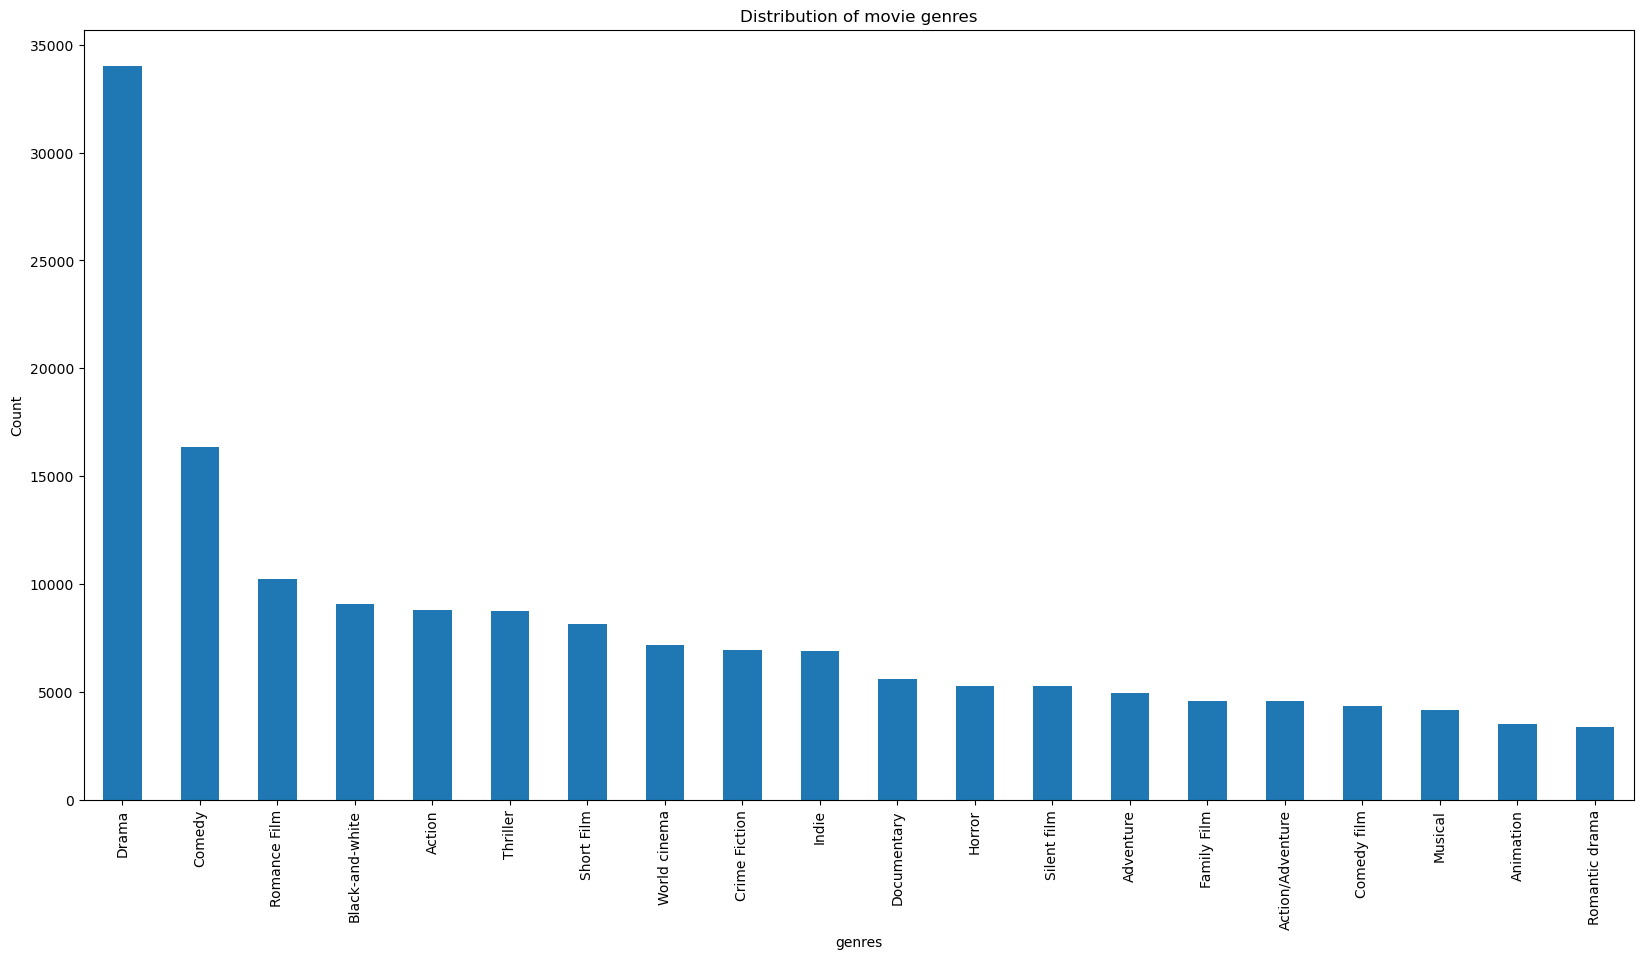

In [23]:
df_movies["genres"] = df_movies.apply(lambda row: extract_list(row, "genres"), axis=1)

# Replace empty lists by NaN
df_movies["genres"] = df_movies["genres"].apply(lambda x: np.nan if len(x) == 0 else x)

df_movies_exploded = df_movies.explode("genres")

# Plot the distribution for the top 20 genres 
plt.figure(figsize=(20, 10))
plt.title("Distribution of movie genres")
plt.xlabel("Movie genres")
plt.ylabel("Count")
df_movies_exploded["genres"].value_counts().head(20).plot(kind="bar")
plt.show()

#### Countries

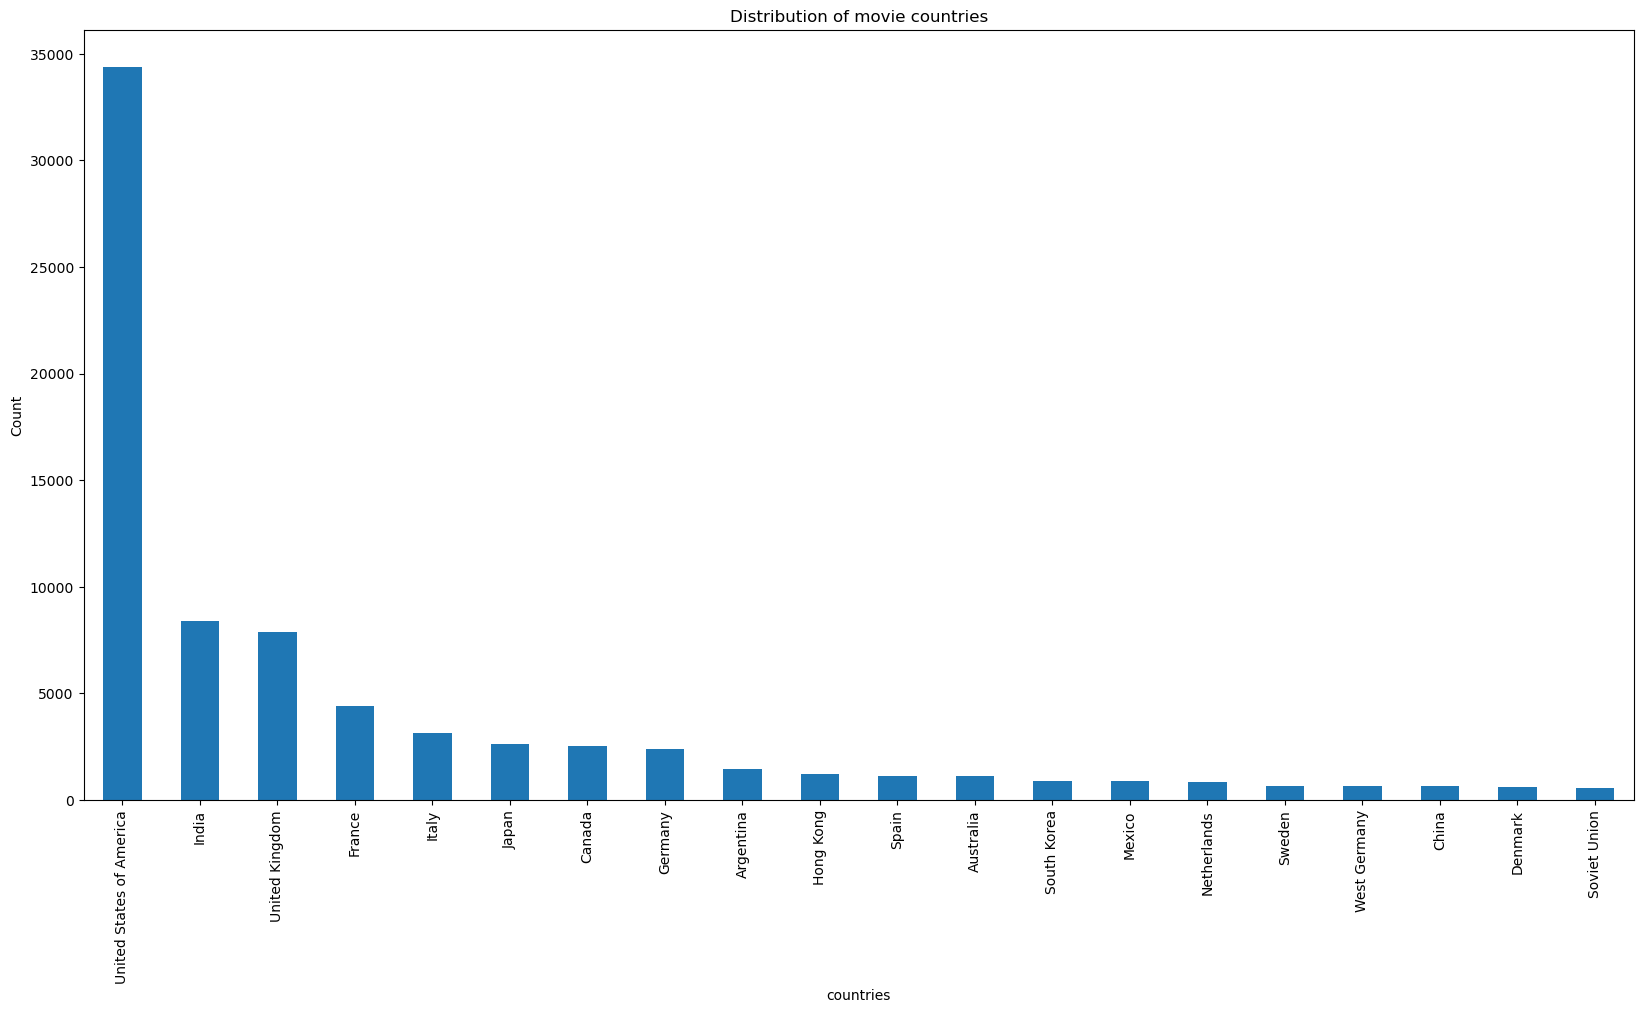

In [24]:
df_movies["countries"] = df_movies.apply(
    lambda row: extract_list(row, "countries"), axis=1
)

# Replace empty lists by NaN
df_movies["countries"] = df_movies["countries"].apply(
    lambda x: np.nan if len(x) == 0 else x
)

df_movies_exploded = df_movies.explode("countries")

# Plot the distribution for the top 20 countries
plt.figure(figsize=(20, 10))
plt.title("Distribution of movie countries")
plt.xlabel("Movie countries")
plt.ylabel("Count")
df_movies_exploded["countries"].value_counts().head(20).plot(kind="bar")
plt.show()

We observe that US movies represent the large majority of the dataset.

#### Languages

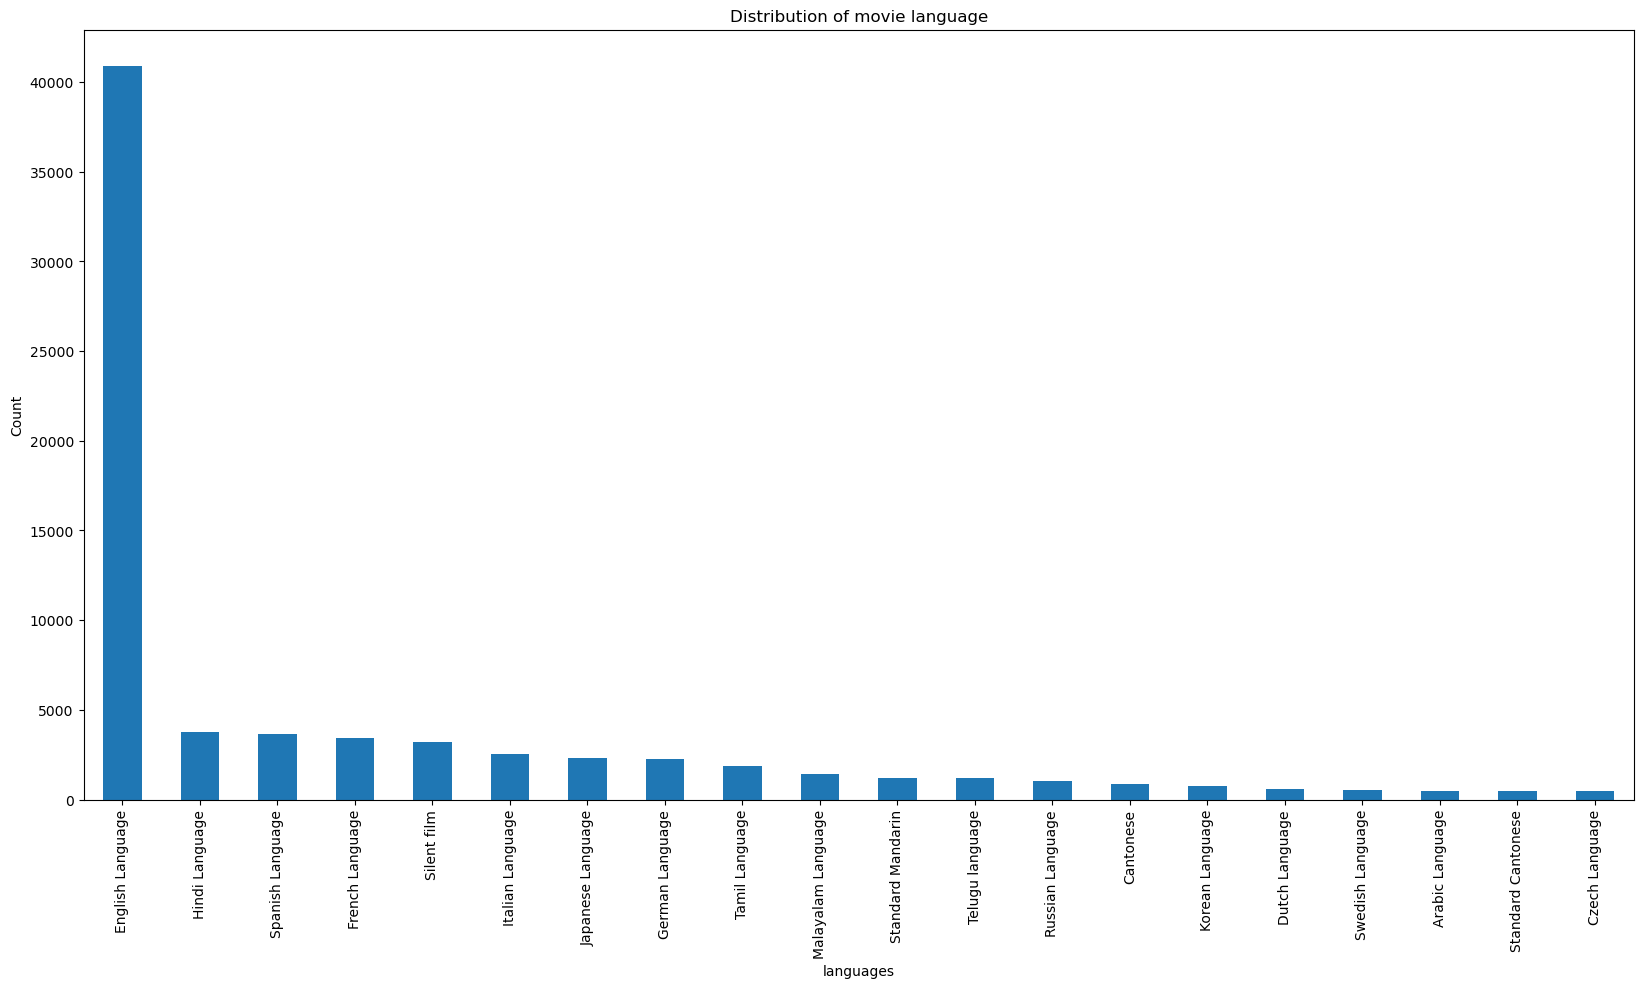

In [25]:
df_movies["languages"] = df_movies.apply(
    lambda row: extract_list(row, "languages"), axis=1
)

# Replace empty lists by NaN
df_movies["languages"] = df_movies["languages"].apply(
    lambda x: np.nan if len(x) == 0 else x
)

df_movies_exploded = df_movies.explode("languages")

# Plot the distribution for the top 20 languages
plt.figure(figsize=(20, 10))
plt.title("Distribution of movie language")
plt.xlabel("Movie language")
plt.ylabel("Count")
df_movies_exploded["languages"].value_counts().head(20).plot(kind="bar")
plt.show()

## Plot summaries dataset
### Plots data exploration

In [26]:
# Load the data
df_plots = pd.read_table(
    PLOT_SUMMARIES, names=["wikipedia_id", "plot_summary"], header=None
)
df_plots.head()

,wikipedia_id,plot_summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [27]:
df_plots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42303 entries, 0 to 42302
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   wikipedia_id  42303 non-null  int64 
 1   plot_summary  42303 non-null  object
dtypes: int64(1), object(1)
memory usage: 661.1+ KB


In [28]:
print(
    f"There are {df_plots.duplicated(subset=['plot_summary']).sum()} duplicated plot summaries:"
)
df = pd.DataFrame(df_plots[df_plots.duplicated(subset=["plot_summary"])])
df

There are 8 duplicated plot summaries:


,wikipedia_id,plot_summary
14631,14055212,A woman is thrown out of her home by her jealo...
29428,14022275,A woman is thrown out of her home by her jealo...
30987,14051944,A woman is thrown out of her home by her jealo...
31702,14053389,A woman is thrown out of her home by her jealo...
35058,19609453,Raja was adopted by a criminal don at a very ...
38536,14616220,"As the American Civil War begins, Ned Burton l..."
38831,10791937,Taking a step aside from the usual serious dra...
39019,29481480,An orphan Raghav turns into a ruthless contrac...


In [29]:
df_movies[df_movies["wikipedia_id"].isin(df["wikipedia_id"])].sort_values(
    by=["wikipedia_id"]
)

,wikipedia_id,freebase_id,title,release_date,revenue,runtime,languages,countries,genres
59142,10791937,/m/02qq36m,Ninaithale Inikkum,1979-04-14,NaN,143.0,[Tamil Language],[India],"[Romantic drama, Romance Film, Drama, World ci..."
18993,14022275,/m/03cr7rh,Madame X,1916-01-14,NaN,NaN,"[Silent film, English Language]",[United States of America],"[Silent film, Drama, Indie, Black-and-white]"
57569,14051944,/m/03cs4lh,Madame X,1954-01-01,NaN,109.0,[Greek Language],[Greece],"[Drama, Black-and-white]"
65014,14053389,/m/03cs5sb,Madame X,1981-03-16,NaN,100.0,[English Language],[United States of America],[Drama]
4551,14055212,/m/03cs72m,The Trial of Madame X,1948-01-01,NaN,54.0,[English Language],[United Kingdom],"[Drama, Black-and-white, Courtroom Drama]"
15783,14616220,/m/03gqq2m,The Warrens of Virginia,1915-02-15,NaN,NaN,"[Silent film, English Language]",[United States of America],"[Silent film, Drama, Indie, Black-and-white]"
22185,19609453,/m/05b2vs4,Amar Deep,1979-01-01,NaN,NaN,[Hindi Language],[India],"[Romance Film, Drama]"
28621,29481480,/m/0ds08gq,Drohi,1992-10-25,NaN,NaN,[Hindi Language],[India],"[Thriller, Crime Fiction, Action, Drama]"


The duplicated plots are due to remakes too.

## Movies and Plot summaries datasets merging

In [30]:
# Use the helper function to preprocess the data before the merging
# (here with Plot summaries and after with the external Datasets)
df_movies = preprocess_movie_data(df_movies)

df_movies = df_movies.join(df_plots.set_index("wikipedia_id"), on="wikipedia_id")
df_movies.head()

,wikipedia_id,freebase_id,title,release_date,revenue,runtime,languages,countries,genres,plot_summary
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",NaN
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,[German Language],[Germany],[Drama],"Eva, an upper class housewife, becomes frustra..."


In [31]:
df_movies.to_csv(DATA_FOLDER_PREPROCESSED + 'movie_summaries.csv', index=False)